In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as Trans
from PIL import Image

path_img = 'cat.jpg' 

img_PIL = Image.open(path_img) #PIL形式でファイルを開く
print('PIL形式:', type(img_PIL), img_PIL.size, img_PIL.mode, img_PIL.format) #PILサイズは(幅, 高さ)

Totensor = Trans.ToTensor() #オブジェクト作成
img = Totensor(img_PIL) #torch型に変換
print('Tenso:', type(img), img.shape, f'(Min,Max)={img.min(),img.max()}') #torch.Tensorは(チャネル数, 高さ, 幅)


PIL形式: <class 'PIL.JpegImagePlugin.JpegImageFile'> (1900, 1267) RGB JPEG
Tenso: <class 'torch.Tensor'> torch.Size([3, 1267, 1900]) (Min,Max)=(tensor(0.), tensor(0.9804))


オリジナル： torch.Size([3, 1267, 1900])
配列変換： torch.Size([1267, 1900, 3])


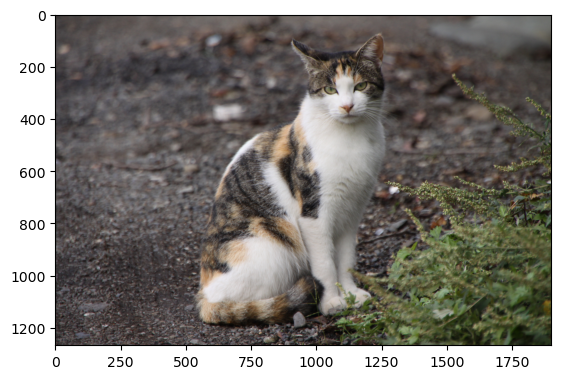

In [3]:
print('オリジナル：', img.shape) #Original
print('配列変換：', img.permute(1,2,0).shape) #torch.Tensorは(チャネル数, 高さ, 幅)なので、(高さ, 幅, チャネル数)に変換
plt.imshow(img.permute(1,2,0))

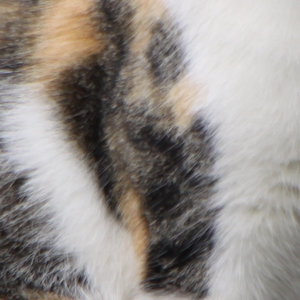

In [5]:
t = Trans.Compose([
    Trans.CenterCrop(size=300) #切取りsize指定
    ])
t(img_PIL)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


PIL形式: <class 'PIL.JpegImagePlugin.JpegImageFile'> (1900, 1267) RGB JPEG
Tenso: <class 'torch.Tensor'> torch.Size([3, 1267, 1900]) (Min,Max)=(tensor(0.), tensor(0.9804))


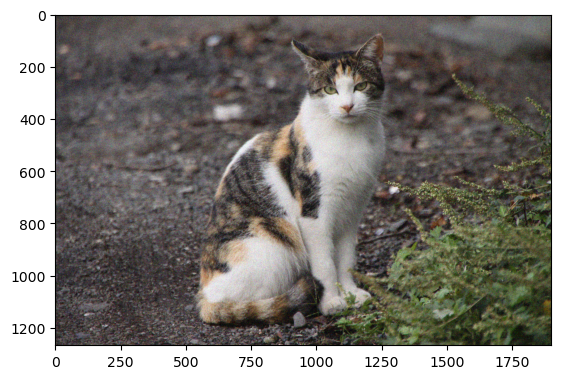

In [21]:
# 画像に Gaussian noise を加える
import torch

class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1., p=0.5):
        self.std = std
        self.mean = mean
        self.p = p
        
    def __call__(self, tensor):
        if torch.rand(1) < self.p:
            return tensor + torch.randn(tensor.size()) * self.std + self.mean
        else:
            return tensor
    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as Trans
from PIL import Image

path_img = 'cat.jpg' 

img_PIL = Image.open(path_img) #PIL形式でファイルを開く
print('PIL形式:', type(img_PIL), img_PIL.size, img_PIL.mode, img_PIL.format) #PILサイズは(幅, 高さ)

Totensor = Trans.ToTensor() #オブジェクト作成
img = Totensor(img_PIL) #torch型に変換
print('Tenso:', type(img), img.shape, f'(Min,Max)={img.min(),img.max()}') #torch.Tensorは(チャネル数, 高さ, 幅)

t = Trans.Compose([
    AddGaussianNoise(mean=0.0, std=0.1, p=1.0)
    ])
img = t(img)

plt.imshow(img.permute(1,2,0))